In [18]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [57]:
df = pd.read_csv("wage-data-coast.csv")
df.head()

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


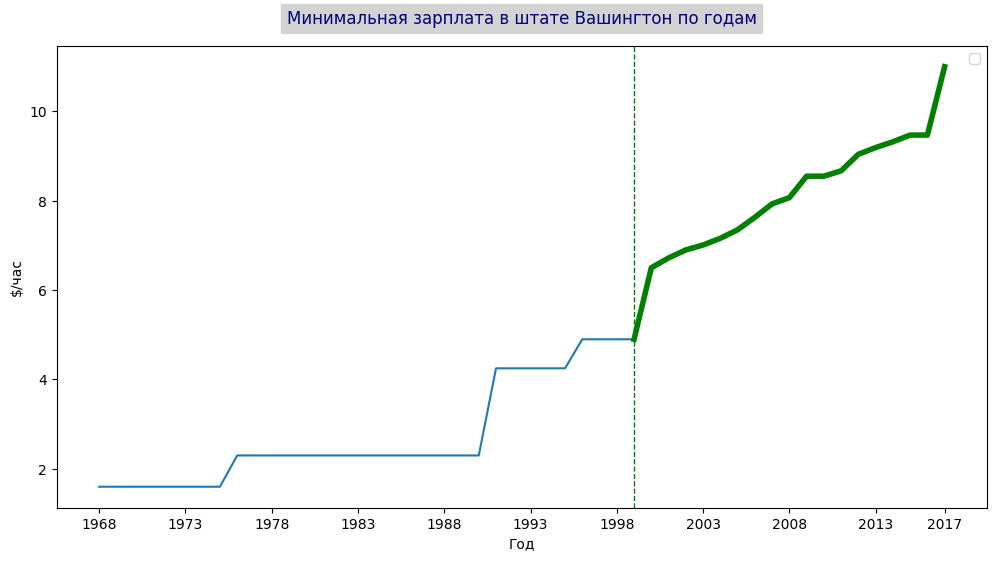

In [65]:
fig, ax = plt.subplots(figsize=(12, 6))

data = df[df["State"] == "Washington"][["Year", "Salary"]]

data_1 = data[data["Year"]<=1999]
data_2 = data[data["Year"]>=1999]

ax.plot(data_1["Year"], data_1["Salary"])
ax.plot(data_2["Year"], data_2["Salary"], color="green", linewidth=4)
ax.axvline(x=1999, color='green', linewidth=1, linestyle="--")
ax.set_title("Минимальная зарплата в штате Вашингтон по годам", pad=16, color="navy",
            backgroundcolor = "lightgrey")
ax.set_xlabel("Год")
ax.set_ylabel("$/час")
ax.set_xticks(list(range(data["Year"].min(), data["Year"].max(), 5)) + [data["Year"].max()])
ax.legend()

plt.show()

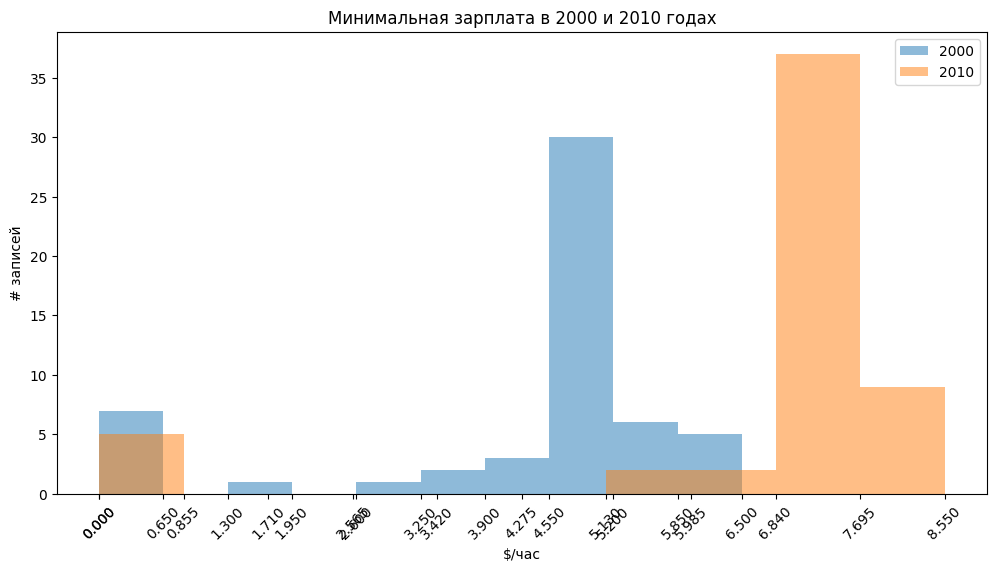

In [28]:
data = df[df["Year"] == 2000]["Salary"]
data1 = df[df["Year"] == 2010]["Salary"]

fig, ax = plt.subplots(figsize=(12, 6))
_, bins, _ = ax.hist(data, label="2000", alpha=0.5)
_, bins1, _ = ax.hist(data1, label="2010", alpha=0.5)

ax.set_title("Минимальная зарплата в 2000 и 2010 годах")
ax.set_xlabel("$/час")
ax.set_ylabel("# записей")
ax.set_xticks(list(bins) + list(bins1))
ax.tick_params(axis='x', rotation=45)
ax.legend()
plt.show()

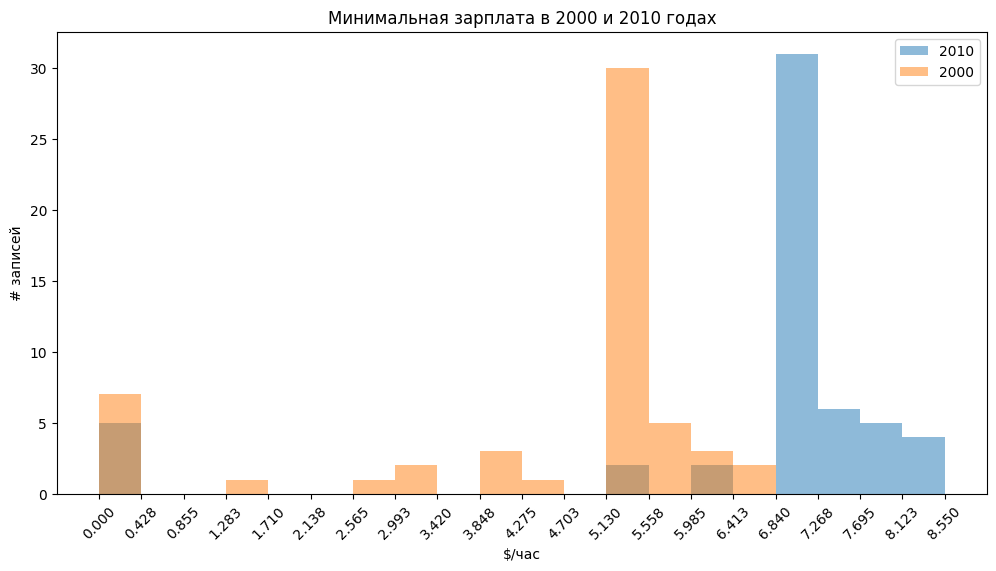

In [31]:
data = df[df["Year"] == 2000]["Salary"]
data1 = df[df["Year"] == 2010]["Salary"]

fig, ax = plt.subplots(figsize=(12, 6))
_, bins1, _ = ax.hist(data1, label="2010", alpha=0.5, bins=20)
ax.hist(data, label="2000", alpha=0.5, bins=bins1)

ax.set_title("Минимальная зарплата в 2000 и 2010 годах")
ax.set_xlabel("$/час")
ax.set_ylabel("# записей")
ax.set_xticks(list(bins1))
ax.tick_params(axis='x', rotation=45)
ax.legend()
plt.show()

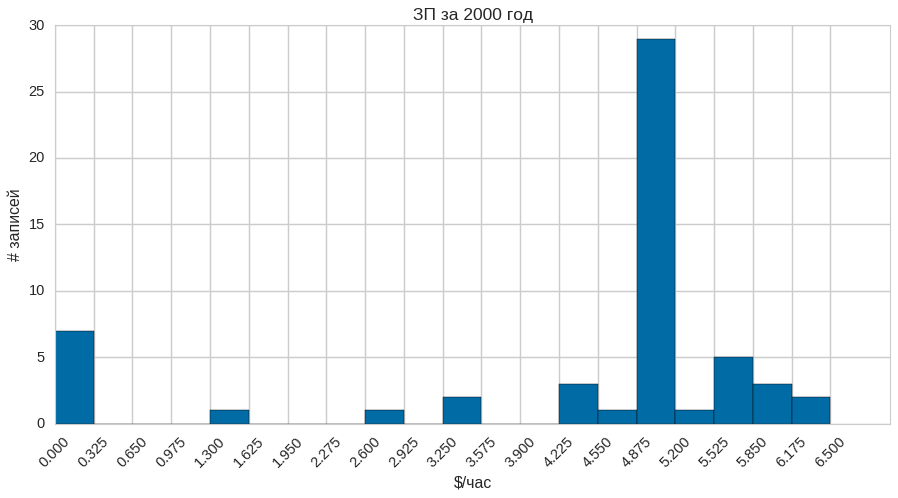

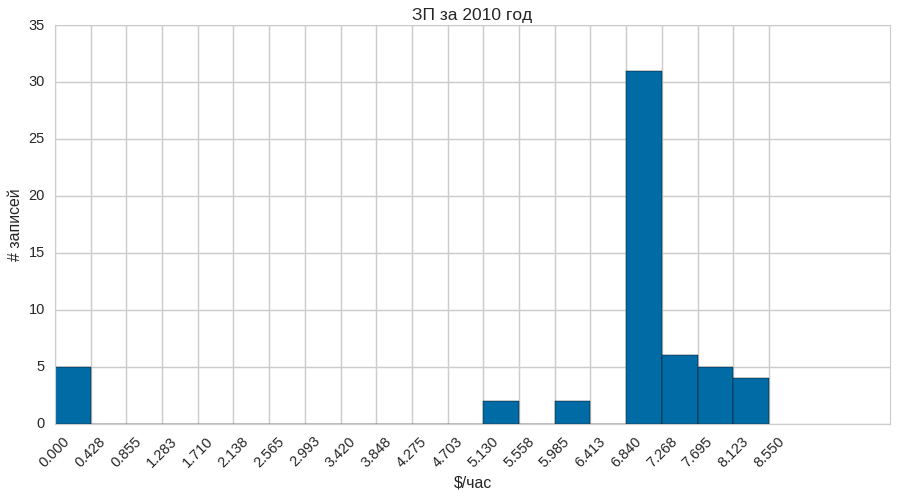

In [91]:
for year in [2000, 2010]:
    data1 = df[df["Year"] == year]["Salary"]

    fig, ax = plt.subplots(figsize=(12, 6))
    _, bins1, _ = ax.hist(data1, label=f'{year}', bins=20)

    ax.set_title(f"ЗП за {year} год")
    ax.set_xlabel("$/час")
    ax.set_ylabel("# записей")
    ax.set_xticks(list(bins1))
    ax.tick_params(axis='x', rotation=45)
    plt.show()

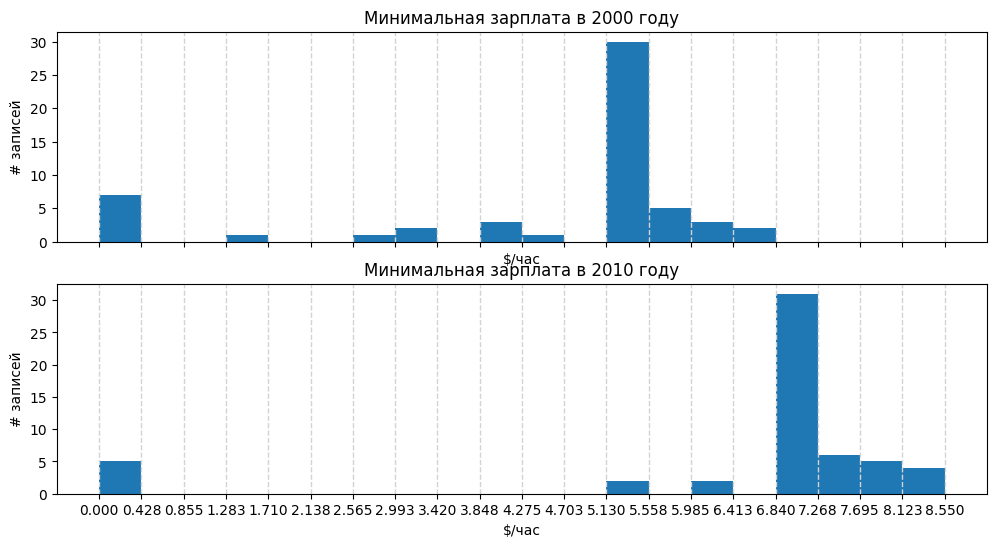

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,6))

data = df[df["Year"] == 2000]["Salary"]
data1 = df[df["Year"] == 2010]["Salary"]

_, bins, _ = axs[1].hist(data1, label="2010", bins=20)
axs[0].hist(data, label="2000", bins=bins)

axs[0].set_title("Минимальная зарплата в 2000 году")
axs[0].set_xlabel("$/час")
axs[0].set_ylabel("# записей")

axs[1].set_title("Минимальная зарплата в 2010 году")
axs[1].set_xlabel("$/час")
axs[1].set_ylabel("# записей")

for ax in axs:
    ax.set_xticks(bins)
    
    for bin_ in bins:
        ax.axvline(x=bin_, color="lightgrey",linewidth=1, linestyle="--")
        
plt.show()

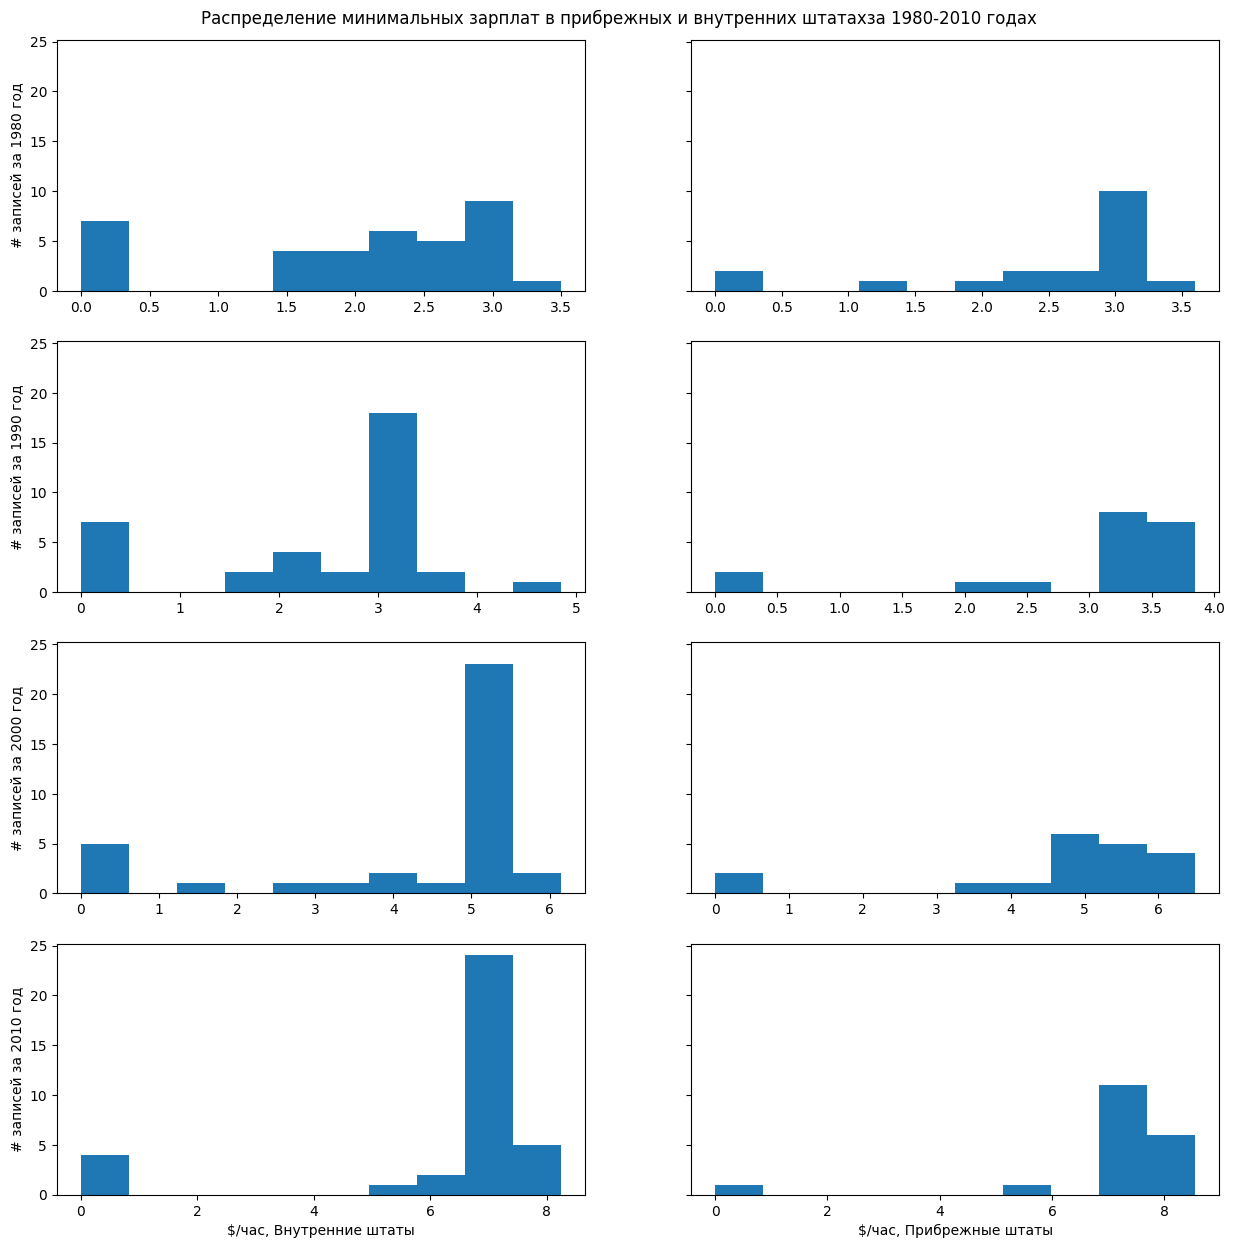

In [59]:
fig, axs = plt.subplots(nrows=4, ncols=2, sharey=True, figsize=(15,15))

years = [1980, 1990, 2000, 2010]
is_coastal = [0, 1]

for i , year in enumerate(years):
    for j, is_c in enumerate(is_coastal):
        data = df[(df["Year"] == year) & (df["IsCoastal"]==is_c)]["Salary"]
        ax = axs[i][j]
        ax.hist(data)
        if i == len(years)-1:
            state_type = "Внутренние" if is_c==0 else "Прибрежные"
            ax.set_xlabel(f"$/час, {state_type} штаты")
        if j==0:
            ax.set_ylabel(f"# записей за {year} год")
fig.suptitle("Распределение минимальных зарплат в прибрежных и внутренних штатах" + 
             "за 1980-2010 годах", y=0.9)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


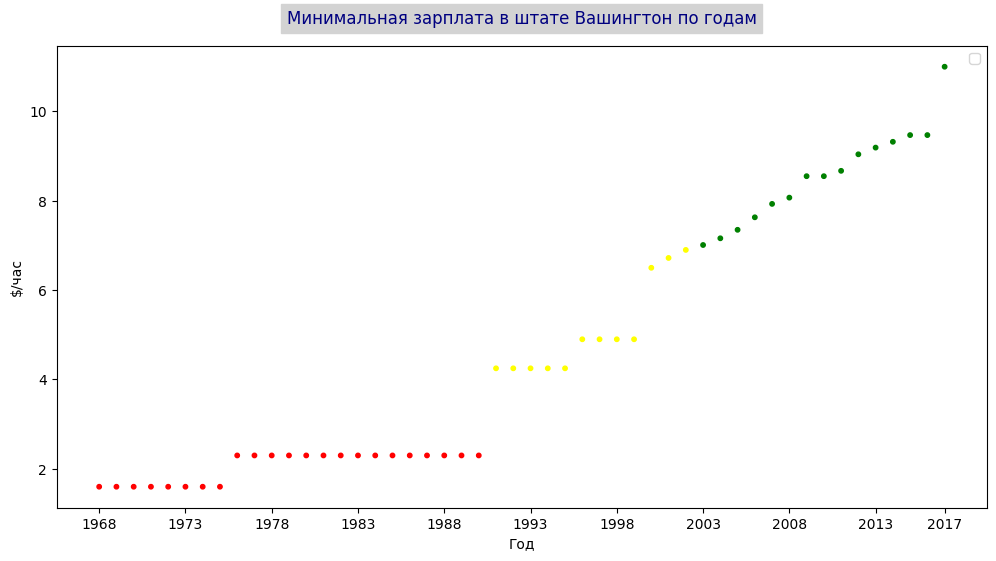

In [68]:
fig, ax = plt.subplots(figsize=(12, 6))

data = df[df["State"] == "Washington"][["Year", "Salary"]]
data["Color"] = 'green'
data.loc[data["Salary"] < 4, "Color"] = 'red'
data.loc[(data["Salary"] >= 4) & (data["Salary"] < 7), "Color"] = 'yellow'


ax.scatter(data["Year"], data["Salary"], color=data["Color"], s=10)

ax.set_title("Минимальная зарплата в штате Вашингтон по годам", pad=16, color="navy",
            backgroundcolor = "lightgrey")
ax.set_xlabel("Год")
ax.set_ylabel("$/час")
ax.set_xticks(list(range(data["Year"].min(), data["Year"].max(), 5)) + [data["Year"].max()])
ax.legend()

plt.show()

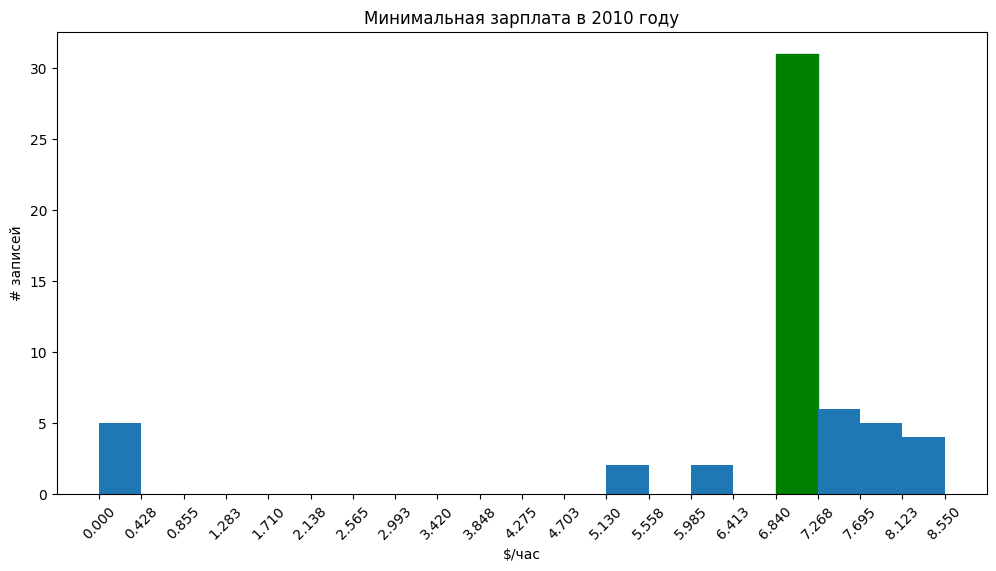

In [74]:
data = df[df["Year"] == 2010]["Salary"]

fig, ax = plt.subplots(figsize=(12, 6))
n, bins, patches = ax.hist(data, label=f'2010', bins=20)
max_index = np.argmax(n)
patches.patches[max_index].set_color('green')

ax.set_title(f"Минимальная зарплата в 2010 году")
ax.set_xlabel("$/час")
ax.set_ylabel("# записей")
ax.set_xticks(list(bins))
ax.tick_params(axis='x', rotation=45)
plt.show()

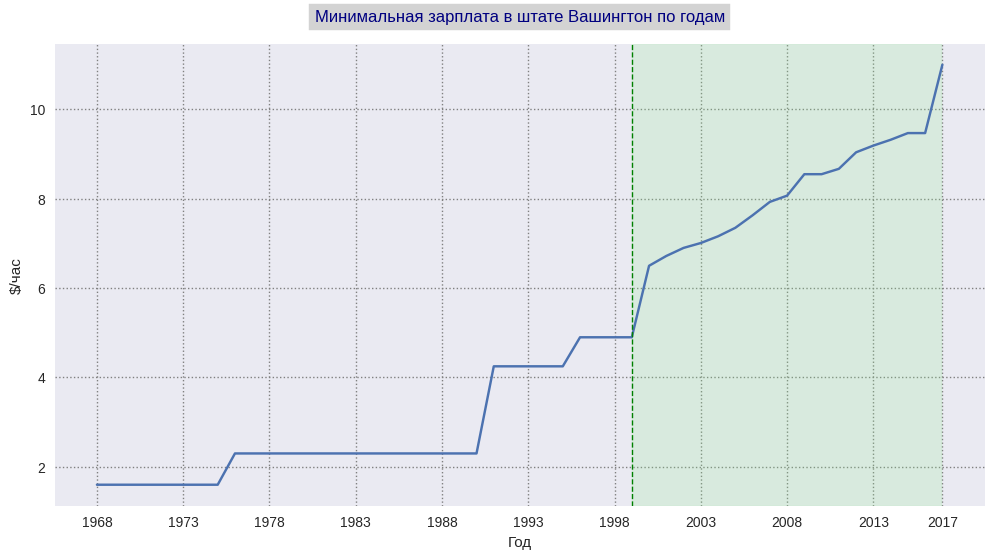

In [87]:
fig, ax = plt.subplots(figsize=(12, 6))

data = df[df["State"] == "Washington"][["Year", "Salary"]]

ax.plot(data["Year"], data["Salary"])
ax.axvline(x=1999, color='green', linewidth=1, linestyle="--")
ax.axvspan(xmin=1999, xmax=data["Year"].max(), color='lightgreen', alpha=0.2)
ax.set_title("Минимальная зарплата в штате Вашингтон по годам", pad=16, color="navy",
            backgroundcolor = "lightgrey")
ax.set_xlabel("Год")
ax.set_ylabel("$/час")
ax.set_xticks(list(range(data["Year"].min(), data["Year"].max(), 5)) + [data["Year"].max()])
ax.grid(color='grey', linestyle=":", linewidth=1)

plt.show()

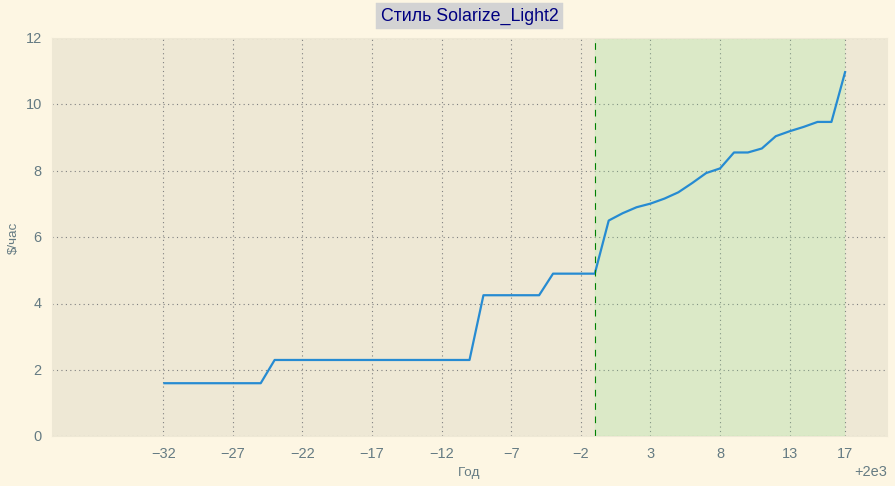

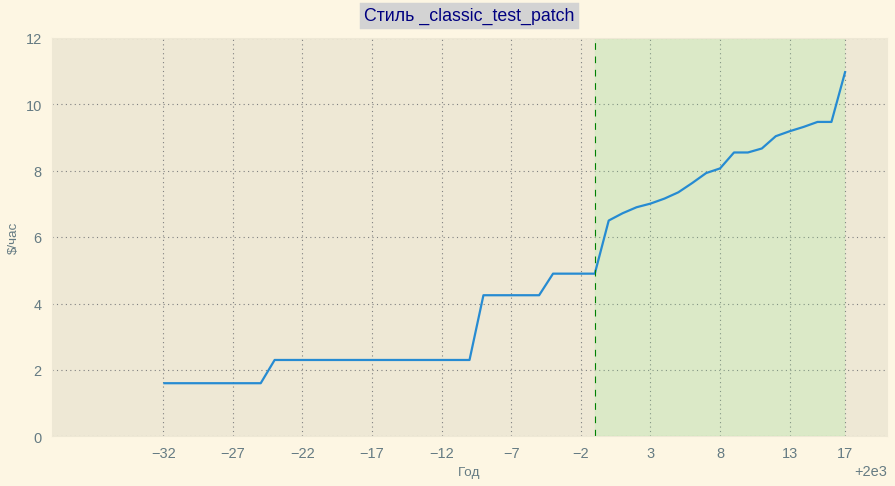

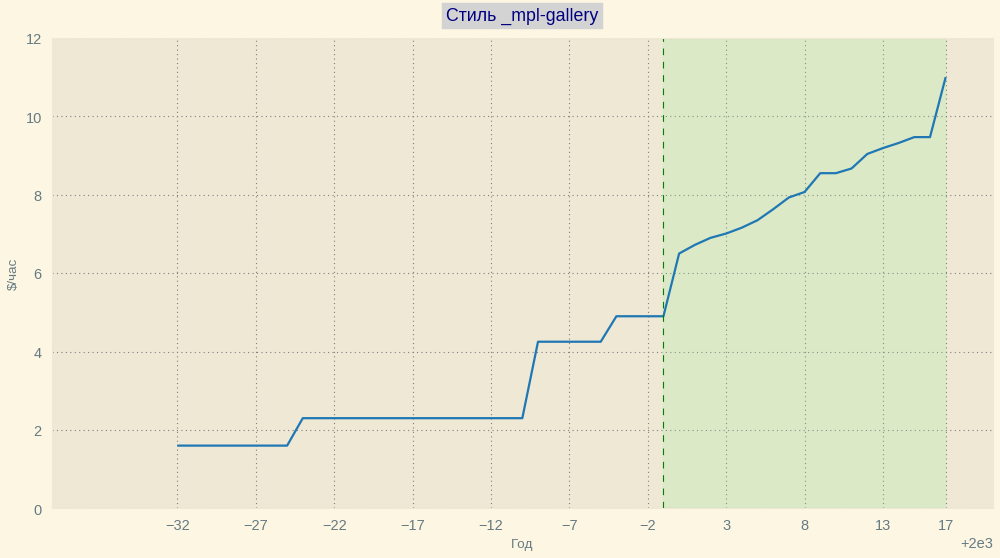

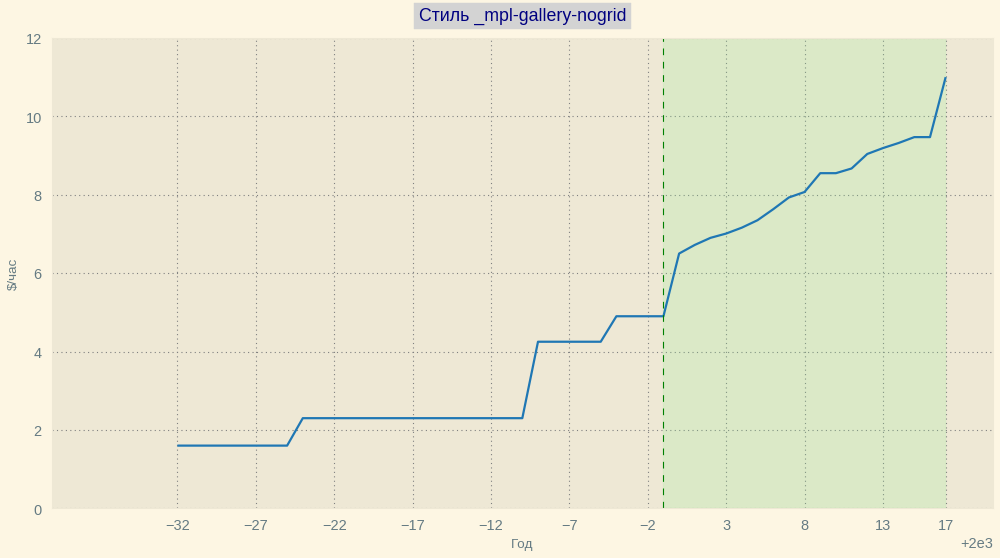

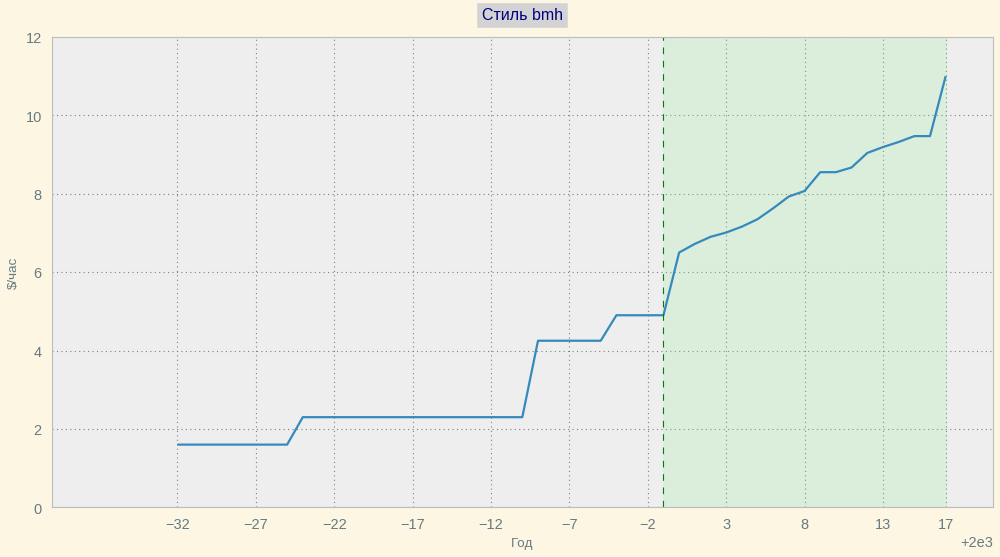

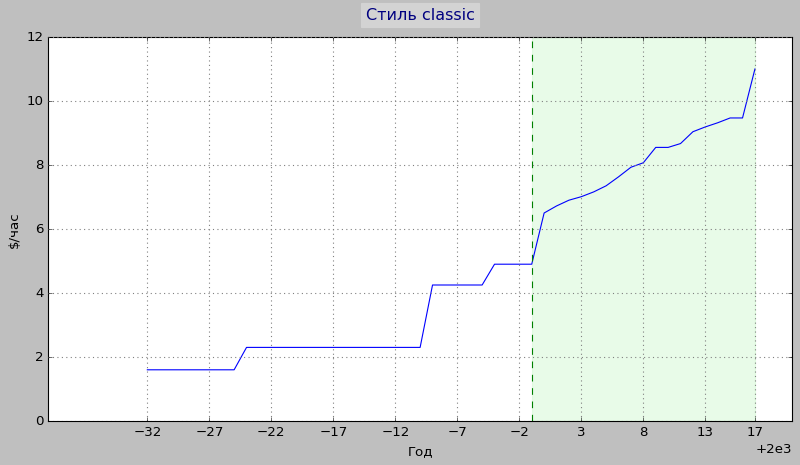

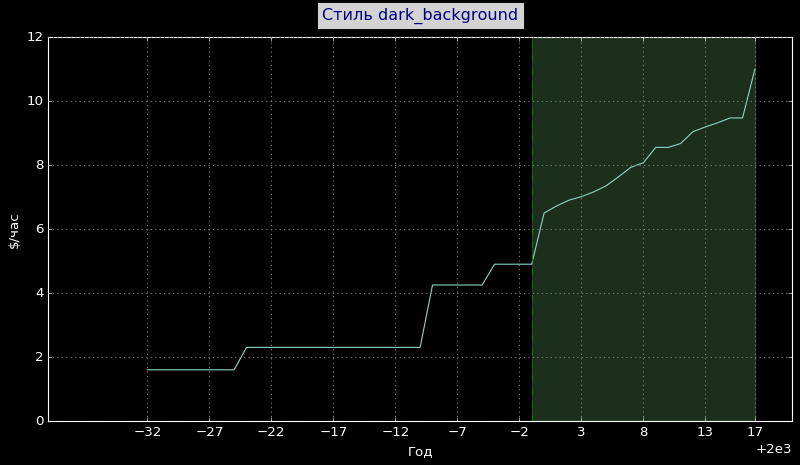

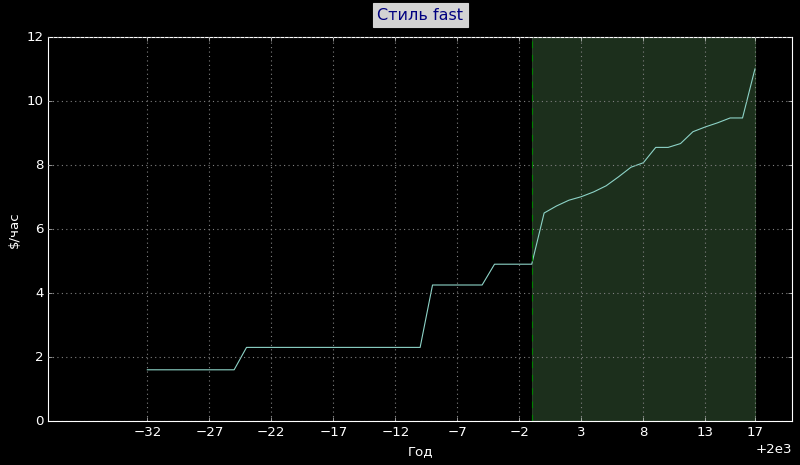

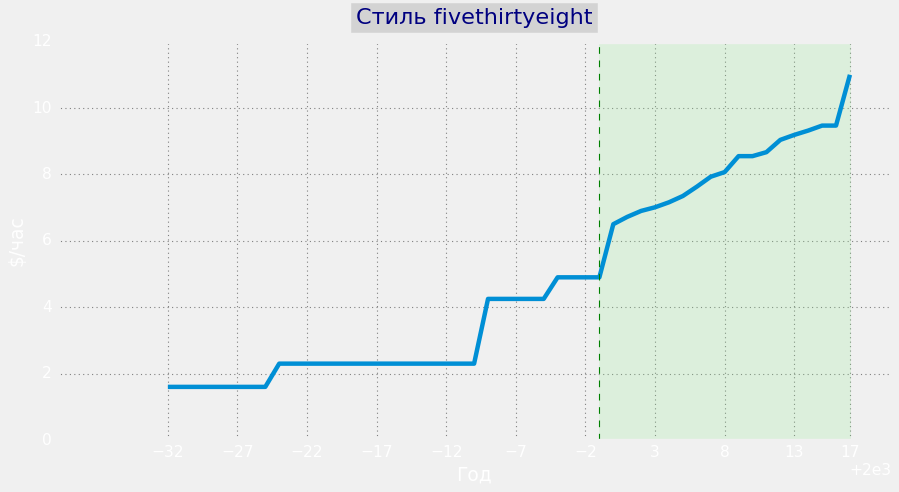

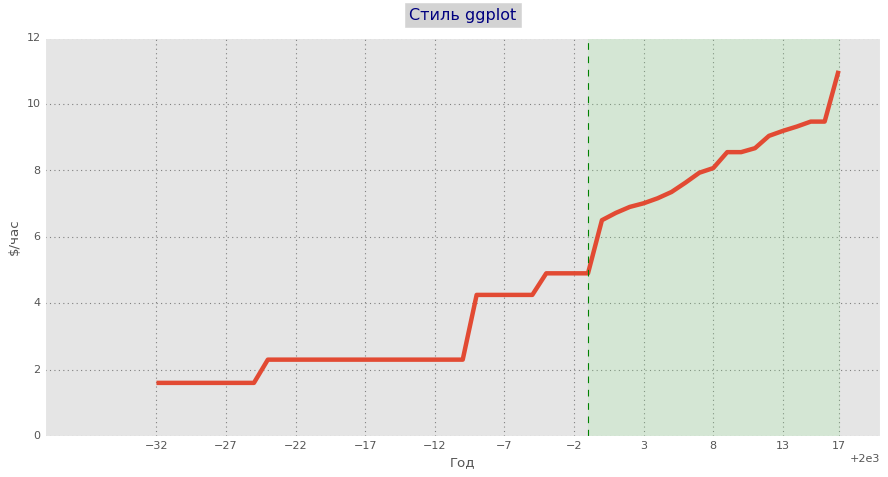

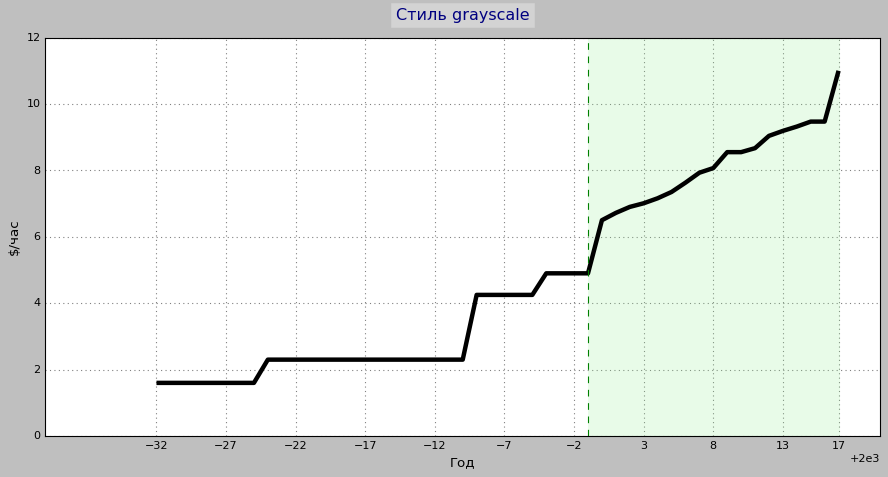

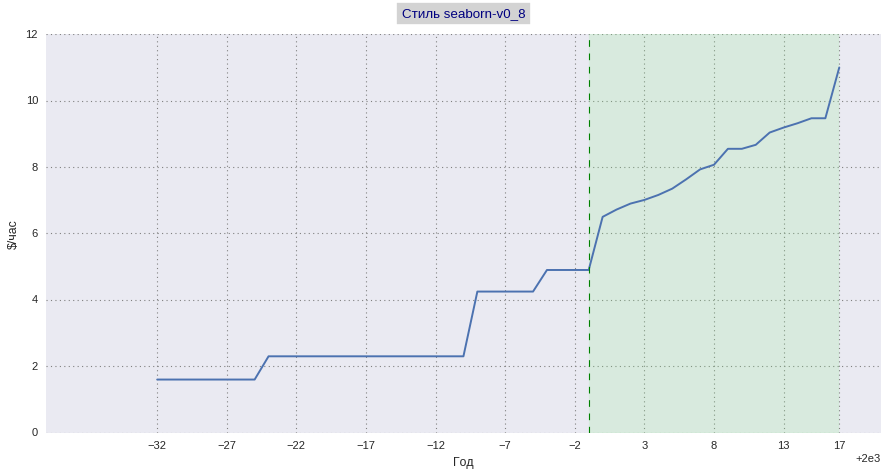

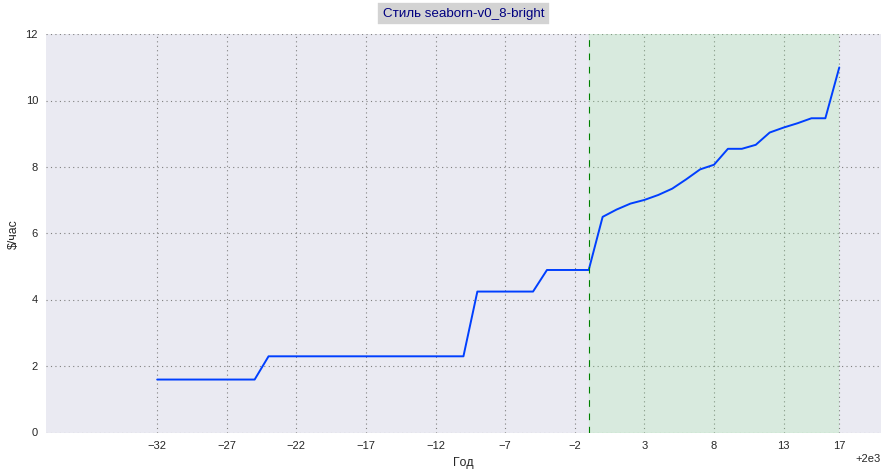

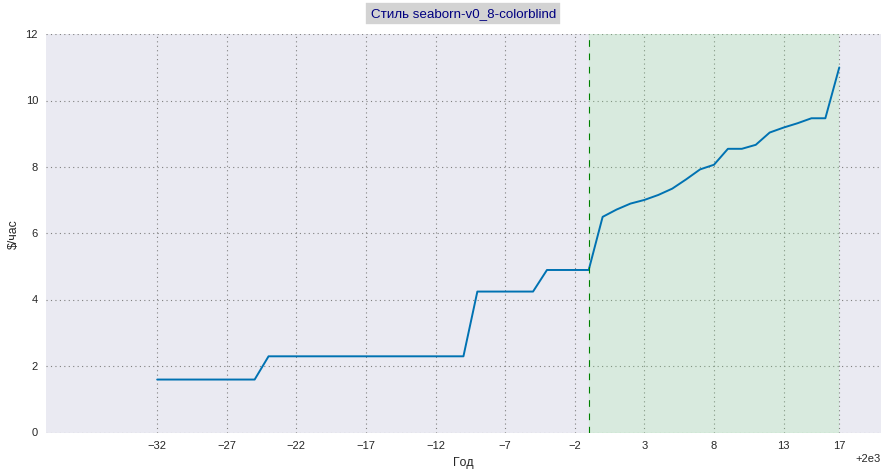

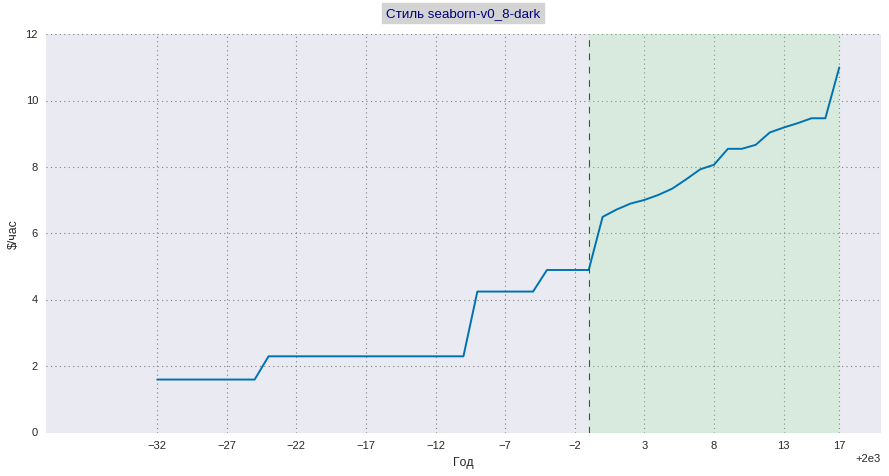

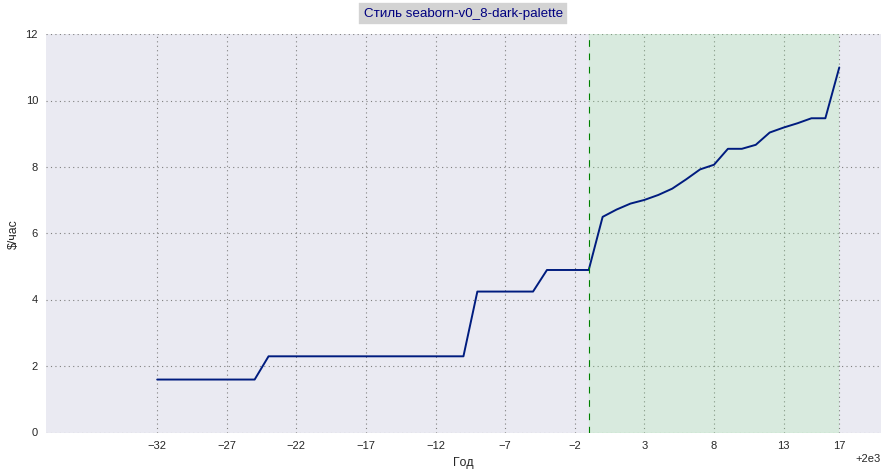

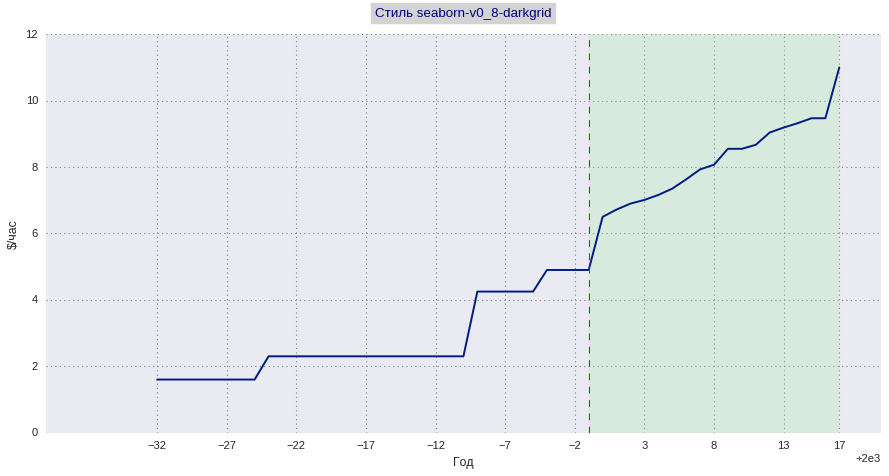

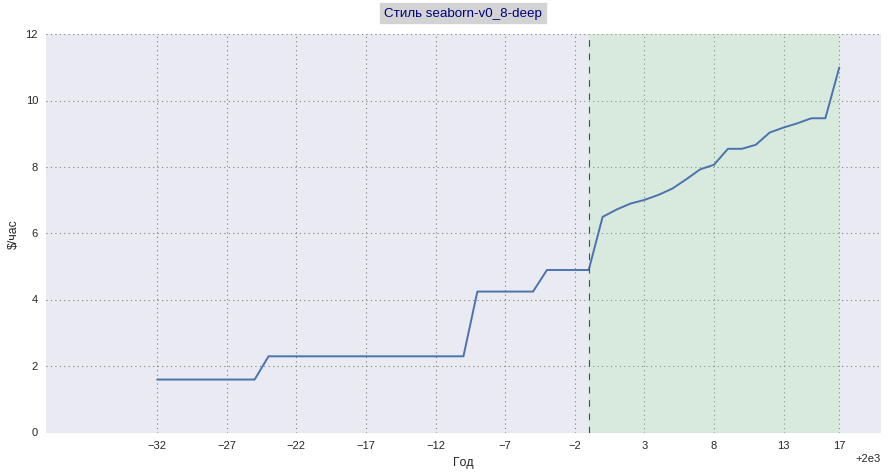

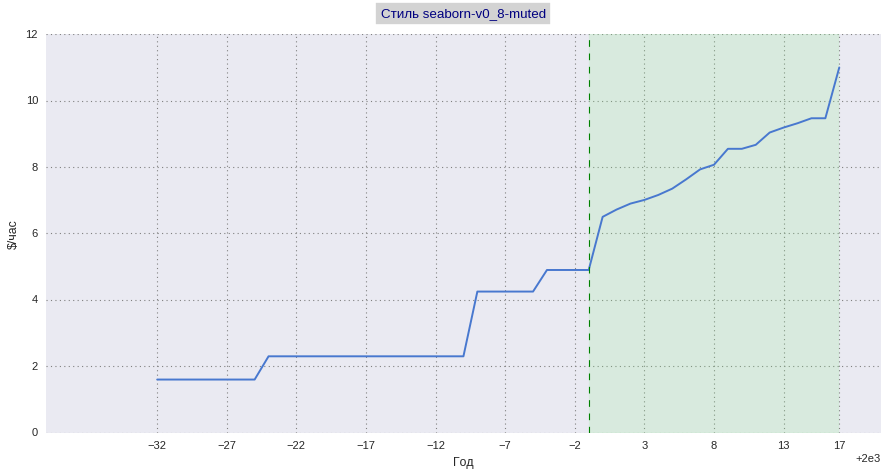

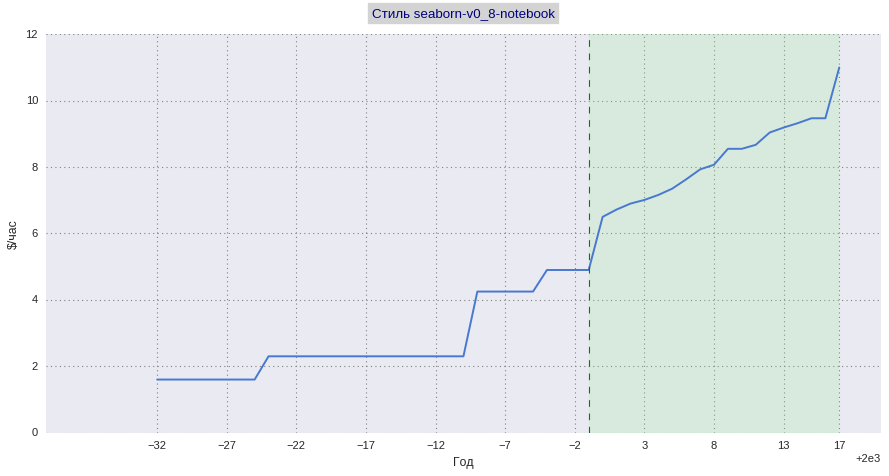

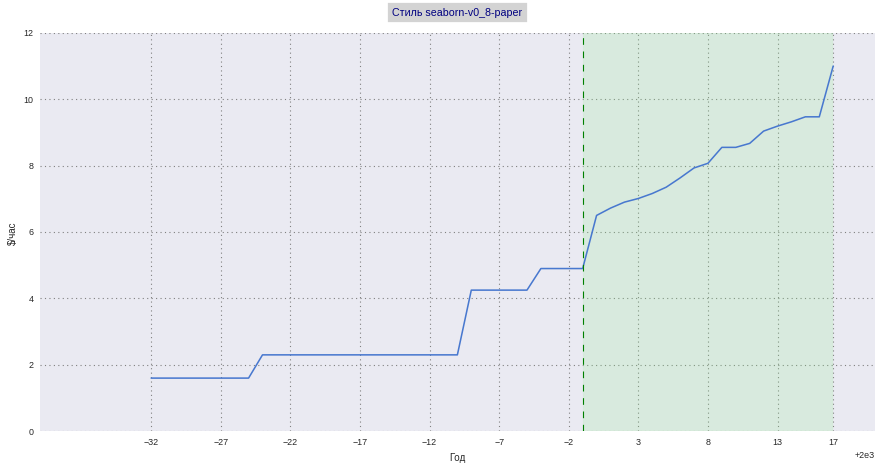

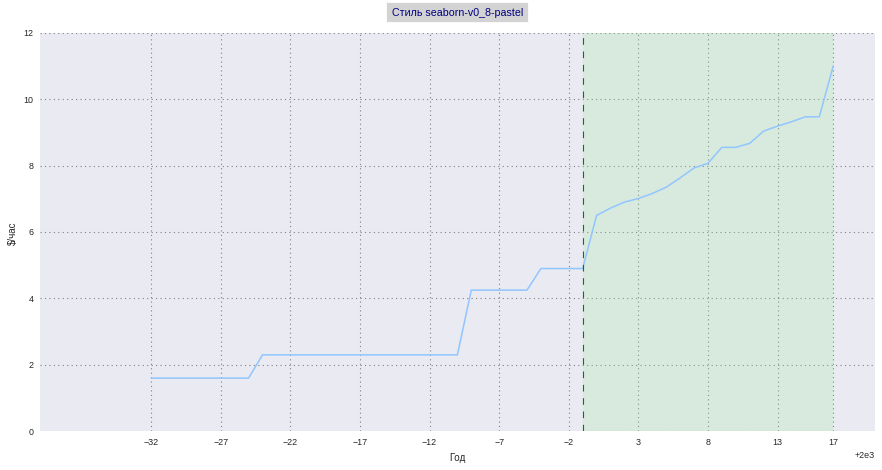

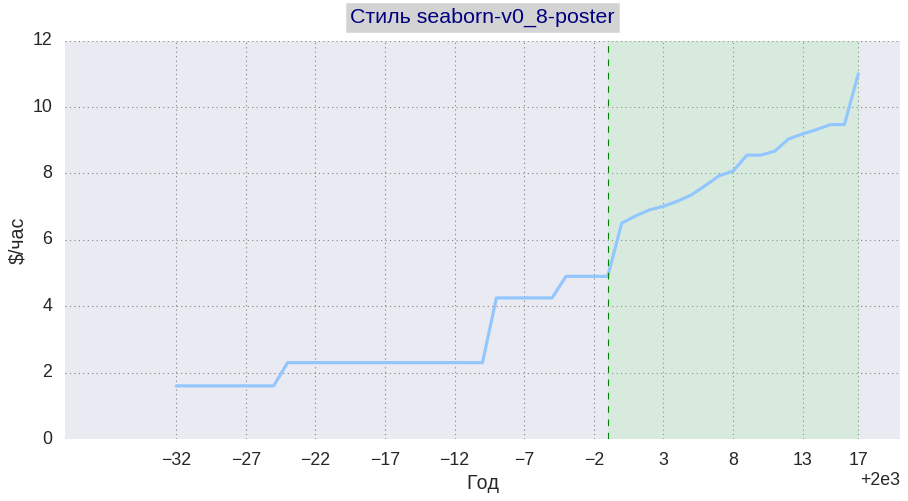

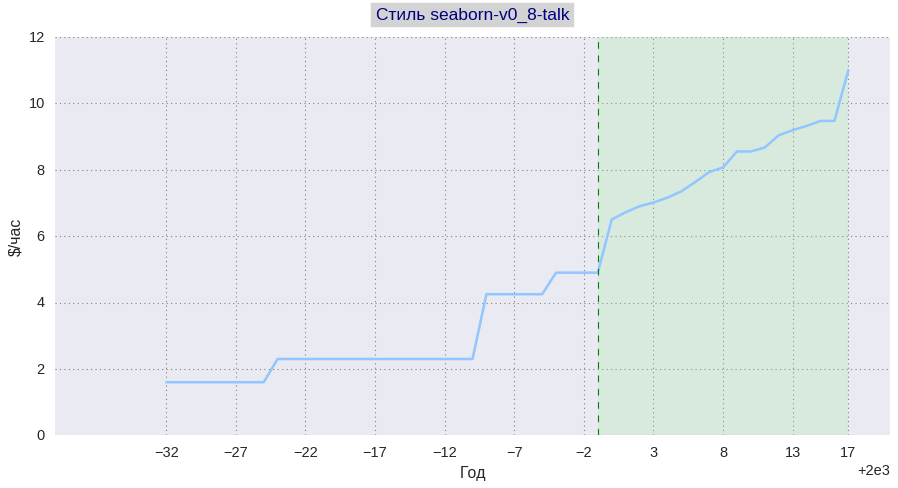

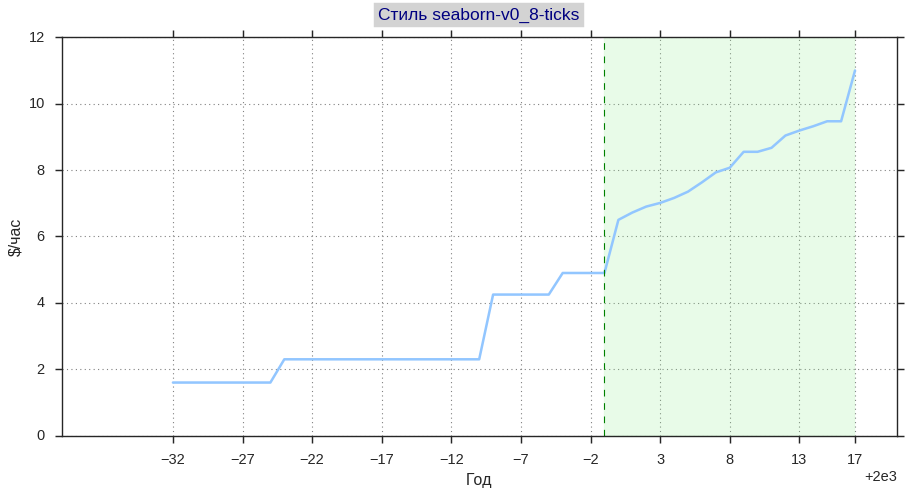

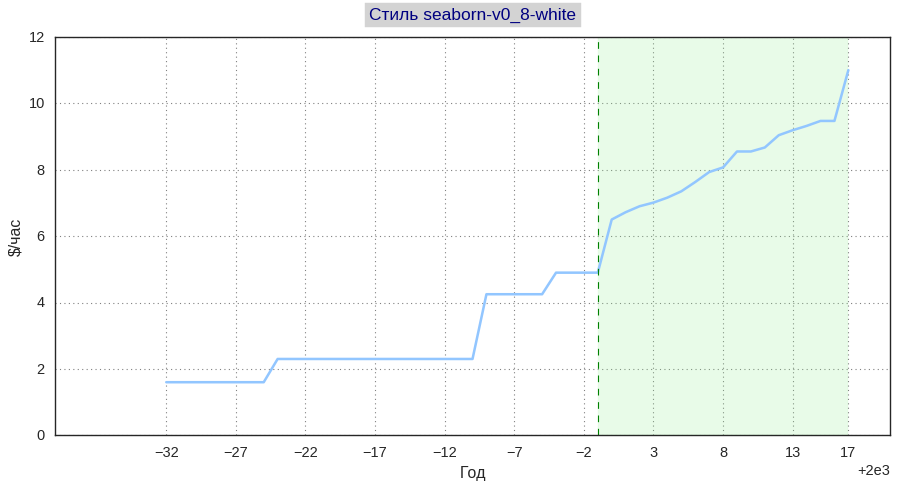

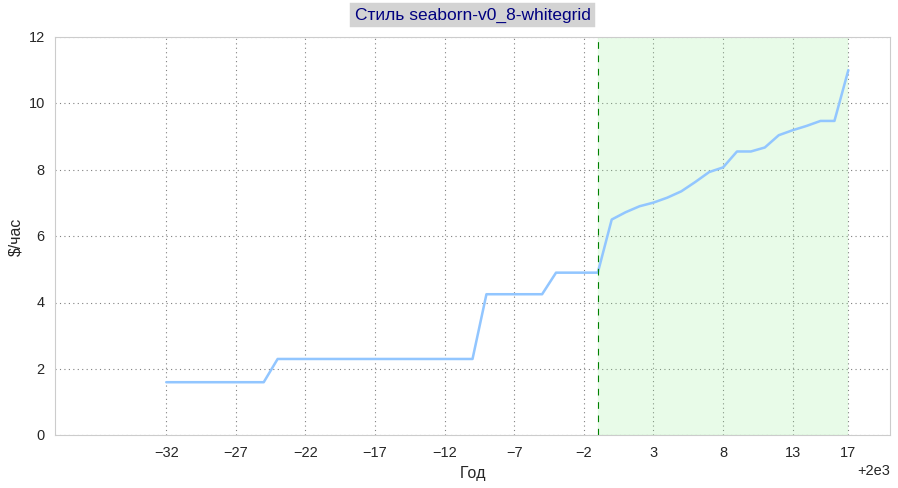

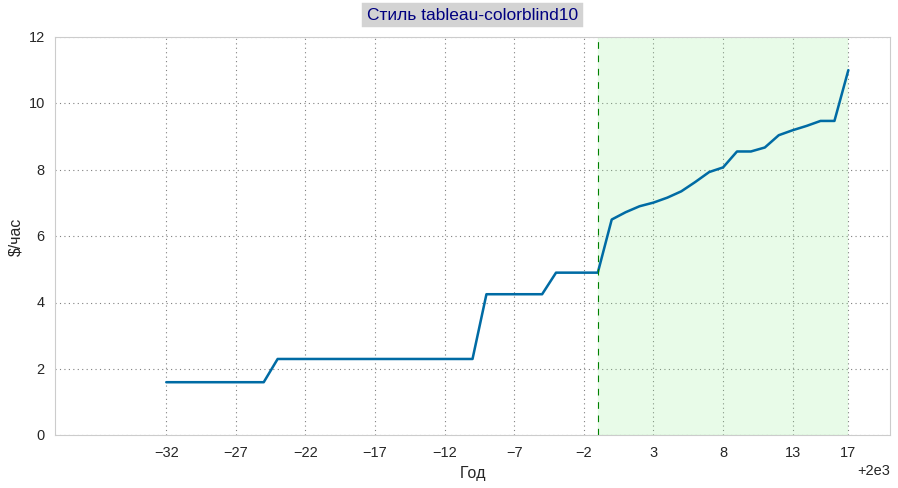

In [93]:
for style in plt.style.available:
    plt.style.use(f"{style}")

    fig, ax = plt.subplots(figsize=(12, 6))

    data = df[df["State"] == "Washington"][["Year", "Salary"]]

    ax.plot(data["Year"], data["Salary"])
    ax.axvline(x=1999, color='green', linewidth=1, linestyle="--")
    ax.axvspan(xmin=1999, xmax=data["Year"].max(), color='lightgreen', alpha=0.2)
    ax.set_title(f"Стиль {style}", pad=16, color="navy",
                backgroundcolor = "lightgrey")
    ax.set_xlabel("Год")
    ax.set_ylabel("$/час")
    ax.set_xticks(list(range(data["Year"].min(), data["Year"].max(), 5)) + [data["Year"].max()])
    ax.grid(color='grey', linestyle=":", linewidth=1)

    plt.show()